In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate,optimize, fftpack
from scipy.integrate import odeint

In [29]:
cases=pd.read_excel('Nl_Ger.xlsx')
cases.replace(np.NaN,0)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_infected,total_deaths,new_deaths,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Recovered,Exposed
0,DEU,Europe,Germany,2019-12-31,0.0,0,0.000,0.000,0.0,0,...,156.139,8.31,28.2,33.1,0.0,8.00,81.33,0.936,0,0.000
1,DEU,Europe,Germany,2020-01-01,0.0,0,0.000,0.000,0.0,0,...,156.139,8.31,28.2,33.1,0.0,8.00,81.33,0.936,0,0.000
2,DEU,Europe,Germany,2020-01-02,0.0,0,0.000,0.000,0.0,0,...,156.139,8.31,28.2,33.1,0.0,8.00,81.33,0.936,0,0.000
3,DEU,Europe,Germany,2020-01-03,0.0,0,0.000,0.000,0.0,0,...,156.139,8.31,28.2,33.1,0.0,8.00,81.33,0.936,0,0.000
4,DEU,Europe,Germany,2020-01-04,0.0,0,0.000,0.000,0.0,0,...,156.139,8.31,28.2,33.1,0.0,8.00,81.33,0.936,0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,NLD,Europe,Netherlands,2020-10-18,219795.0,8105,7387.571,36905.714,6728.0,29,...,109.361,5.29,24.4,27.3,0.0,3.32,82.28,0.931,195933,16049.857
590,NLD,Europe,Netherlands,2020-10-19,228234.0,8439,7683.429,37957.000,6751.0,23,...,109.361,5.29,24.4,27.3,0.0,3.32,82.28,0.931,203712,8129.714
591,NLD,Europe,Netherlands,2020-10-20,235954.0,7720,7808.571,38929.428,6759.0,8,...,109.361,5.29,24.4,27.3,0.0,3.32,82.28,0.931,211690,0.000
592,NLD,Europe,Netherlands,2020-10-21,244103.0,8149,7920.143,31541.857,6804.0,45,...,109.361,5.29,24.4,27.3,0.0,3.32,82.28,0.931,219795,0.000


In [30]:
nedgov = pd.read_csv('NED_GOV.csv', sep=',')
gergov = pd.read_csv('GER_GOV.csv', sep=',')

In [41]:
gercases = cases.iloc[0:293,7]/83
nedcases = cases.iloc[299:592,7]/17
dates = cases.iloc[0:293,3]

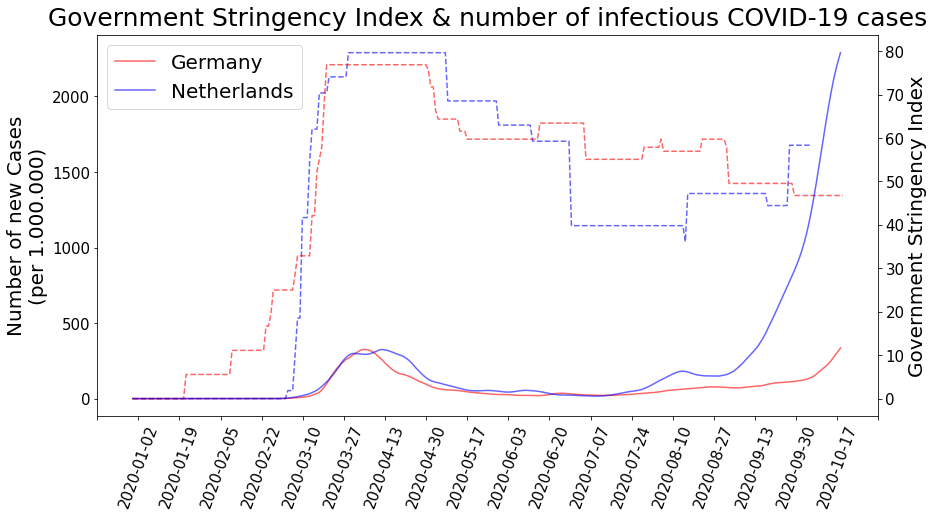

In [42]:
fig = plt.figure(figsize = (14,7))
ax=fig.add_subplot(111, label="1")
ax.plot(nedgov['2020-01-01'],nedgov['0'],'b--',label = "Netherlands", alpha = 0.6)
ax.plot(gergov['2020-01-01'],gergov['0'],'r--',label = "Germany", alpha = 0.6)
ax.set_ylabel("Government Stringency Index", size = 20)
ax2 = fig.add_subplot(111, label ="2", frame_on = False)
ax2.plot(dates,gercases,'r', label = "Germany", alpha = 0.6)
ax2.plot(dates,nedcases,'b', label = "Netherlands", alpha = 0.6)
ax2.set_ylabel("Number of new Cases\n(per 1.000.000)", size = 20)
# ax.set_xlabel("Date", size = 20)
ax2.yaxis.set_label_position('left')
ax.yaxis.set_label_position('right')
# ax2.set_xticks([])
ax.set_xticks([])
ax2.legend(fontsize = 20, loc = "upper left")

ax.yaxis.tick_right()
for tick in ax2.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)
for tick in ax.yaxis.get_major_ticks():
    tick.label2.set_fontsize(15)
for tick in ax2.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
xmin, xmax = ax.get_xlim()
plt.title("Government Stringency Index & number of infectious COVID-19 cases", size = 25, y=1.01)
plt.xticks(np.round(np.linspace(xmin,xmax,20),2), rotation=70)
plt.show()